# Требуется: 
1) написать классификатор, который по параметрам будет определять класс

2) оценить качество написанного классификатора

3) кратко описать решение (1-2 абзаца), написать какие были выбраны алгоритмы для решения задачи и почему

Решение необходимо реализовать на Python 3 версии и представить исходник в формате iPython notebook (*.ipynb)

In [ ]:
## Решение
1. Таблица состоит из трех колонок ['Param_1', 'Param_2','Param_3'], не считая колонки с классом.
2. Колонки ['Param_1', 'Param_2'], судя по наполнению, можно объединить простым сложением строк.
3. Колонка ['Param_3'] представляет собой текст в формате xml.
4. Представлены данные для 4х классов. Распределение классов не равномерное. 
Первые три класса в среднем представлены 1000 значений выборки. Четвертый класс 'Другое' представлен 4000 значений.
5. Колонки ['Param_1' + 'Param_2'] содержат текст с запросами. 
Текст очищается от вспомогательных символов типа "/ . , ;" и т.п.
Вычисляется вектор с уникальными словами из русского языка и составляется новая таблица, 
где все уникальные слова преобразуются в названия колонок, а значение строк заменяется '0', 
если такого слова нет в ['Param_1' + 'Param_2'], и на '1', если такое слово есть.
Это преобразование чем то похоже на OneHotEncoder.
В итоге получаем таблицу, состоящую только из '0' и '1'.
6. Колонка ['Param_3'] с помощью библиотеки xmltodict разбивается в таблицу mtr, 
где каждая колонка, это ключ тэга в xml структуре, а значение колонки - это значение соответствующего тэга.
Затем почистим таблицу mtr от "не русских" букв, почистим от 'nan' и пересобираем текстовые поля, 
собираем вектор уникальных значений (wordsvec) из матрицы.
7. Объединяем все рабочие матрицы в одну (rezult_matr), в которой все значения равны '0' или '1'
8. Получаем numpy.array(X и y).
9. Сделаем небольшой баланс классов. Разобьем выборку на обучающую и тестовую.
10. Применим модель DecisionTreeClassifier.
Визуализируем дерево решений для анализа. Отберем первые 100 значимых features для ускорения работы моделей.
11. Применим модели: DecisionTreeClassifier, KNeighborsClassifier, ExtraTreeClassifier,GradientBoostingClassifier,
LinearSVC, RandomForestClassifier. Выбор моделей ограничен временными рамками задания. Необходимо проанализировать и 
другие возможнные модели (например: lightgbm, xgboost). Модели имеют небольшой (для экономии времени) подбор параметров
с помощью GridSearchCV. Проведен небольшой анализ, что увеличение количества выбранных фич не сильно увеличивает score.
Но для финальной модели надо, конечно, попробовать все фичи и перебор большего количества параметров модели.
12. Проанализируем качество моделей с помощью accuracy_score.
13. Удалим из списка моделей, те, что имеют accuracy_score меньшее, чем среднее значение accuracy_score всех моделей.
14. Посмотрим на матрицу 'compare_matr'. В ней содержится название модели и параметры [precision, recall, f1-score] для
каждой модели, для теста и трейна. По таблице видно, какая модель лучше определяет какой класс.
Таким образом, для определения класса: 
0 - Проблемы с кредитами: статус заявки на кредит  - необходимо использовать модель [ExtraTreeClassifier]
1 - Перевод из подразделения в подразделение  - необходимо использовать модель [DecisionTreeClassifier]
2 - Пропала история операций / несколько анкет   - необходимо использовать модель [DecisionTreeClassifier]
3 - Другое  - необходимо использовать модель [ExtraTreeClassifier]
15. В алгоритме на фазе описания решения найдена некоторая ошибка в пункте 6. Не надо было чистить все "не русские" буквы,
при этом затерлись, возможно важные, стоп слова как ['false', 'true', 'string', 'combo', 'date'], которые могут улучшить 
модель.
16. Так же можно было попробовать и другие преобразования исходных данных.

Итого: среднее значение метрик [precision, recall, f1-score] для каждого класса и модели:
    
0 0.990755 ExtraTreeClassifier
1 0.728796 DecisionTreeClassifier
2 0.731663 DecisionTreeClassifier
3 0.816883 ExtraTreeClassifier


# Загрузка необходимых библиотек

In [1]:
import numpy as np 
import pandas as pd   
from tqdm import tqdm
import matplotlib.pyplot as plt
import xmltodict

%pylab inline
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)
import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import pydot
from sklearn import tree 
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


from sklearn.metrics import auc,average_precision_score,brier_score_loss,classification_report,cohen_kappa_score
from sklearn.metrics import confusion_matrix,f1_score,fbeta_score,hamming_loss,hinge_loss,jaccard_similarity_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support,precision_score,recall_score
from sklearn.metrics import log_loss,matthews_corrcoef,roc_auc_score,roc_curve,zero_one_loss

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image 
import pydotplus

import datetime



from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifierCV, RidgeClassifier, LogisticRegression


Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
class DjStacking(BaseEstimator, ClassifierMixin):  
    def __init__(self, models, ens_model):
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None        
    def Djfit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state=None):
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)               
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)            
        else: # используем всё обучение            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)          
        return self

    def Djpredict(self, X, y=None):
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)        
        a = self.ens_model.predict(X_meta)        
        return (a)
    
def Djrun(clf, X, y, label):
    a = clf.Djpredict(X)
    print (label + ' AUC-ROC  = ' + str( roc_auc_score(y, a) ))
    return roc_auc_score(y, a)

def run(clf, X, y, label):
    a = clf.predict(X)
    print (label + ' AUC-ROC  = ' + str( roc_auc_score(y, a) ))
    return roc_auc_score(y, a)

def run_a(clf, X, y, label):
    a = clf.predict(X)
    print (label + ' AUC-ROC  = ' + str( accuracy_score(y, a) ))
    return accuracy_score(y, a)
    

def pred(clf, X):
    return clf.predict(X)

def pred_p(clf, X):
    return clf.predict_proba(X)[:, 1]

def print_roc(y, a):
    return ('AUC-ROC  = ' + str( roc_auc_score(y, a) ))
    
def print_acc(y, a):
    return ('ACC  = ' + str( accuracy_score(y, a) ))   

def Djplot_rez(rez):  
    d = len(rez)    
    xticks = [x[0] for x in rez]
    aucs = [x[1] for x in rez]    
    plt.figure(figsize=(d/3+5, 6))
    plt.bar(np.arange(len(aucs)), aucs, color='#0000AA') # , label=u'-'
    plt.xticks(np.arange(len(aucs))+0.1, xticks, rotation=90)
    plt.plot(np.arange(0, d), np.max(aucs) + 0*np.arange(0, d), c='black', label='best base')
    plt.plot(np.arange(0, d), np.min(aucs) + 0*np.arange(0, d), c='red', label='worst base')    
    plt.xlim([0, d])
    plt.ylim([np.min(aucs)-np.min(aucs)*0.01, np.max(aucs)+np.max(aucs)*0.01])
    plt.ylabel('AUC ROC')
    plt.legend(loc=3)   
    
    
    
def matr_of_metrix(model_name, train_y, test_y, pred_train, pred):
    global compare_matr
    tr2 = precision_recall_fscore_support(train_y, pred_train)
    ts2 = precision_recall_fscore_support(test_y, pred)
    
    compare_matrT = pd.DataFrame(np.zeros((4, 10), dtype = float), columns = ['model', 'num', 'train - avg', 'precision', 'recall', 'f1-score', 'test - avg', 'precision', 'recall', 'f1-score' ])
    compare_matrT.loc[:, 'model']  = model_name
    compare_matrT.loc[:, 'num']  = [0,1,2,3]
    
    compare_matrT.loc[0, 'precision']  = tr2[0][0]
    compare_matrT.loc[1, 'precision']  = tr2[0][1]
    compare_matrT.loc[2, 'precision']  = tr2[0][2]
    compare_matrT.loc[3, 'precision']  = tr2[0][3]
    compare_matrT.loc[0, 'recall']  = tr2[1][0]
    compare_matrT.loc[1, 'recall']  = tr2[1][1]
    compare_matrT.loc[2, 'recall']  = tr2[1][2]
    compare_matrT.loc[3, 'recall']  = tr2[1][3]
    compare_matrT.loc[0, 'f1-score']  = tr2[2][0]
    compare_matrT.loc[1, 'f1-score']  = tr2[2][1]
    compare_matrT.loc[2, 'f1-score']  = tr2[2][2]
    compare_matrT.loc[3, 'f1-score']  = tr2[2][3]
    compare_matrT.loc[0, 'train - avg']  = np.mean([tr2[0][0], tr2[1][0], tr2[2][0]])
    compare_matrT.loc[1, 'train - avg']  = np.mean([tr2[0][1], tr2[1][1], tr2[2][1]])
    compare_matrT.loc[2, 'train - avg']  = np.mean([tr2[0][2], tr2[1][2], tr2[2][2]])
    compare_matrT.loc[3, 'train - avg']  = np.mean([tr2[0][3], tr2[1][3], tr2[2][3]])
    
    compare_matrT.loc[0, 'precision']  = ts2[0][0]
    compare_matrT.loc[1, 'precision']  = ts2[0][1]
    compare_matrT.loc[2, 'precision']  = ts2[0][2]
    compare_matrT.loc[3, 'precision']  = ts2[0][3]
    compare_matrT.loc[0, 'recall']  = ts2[1][0]
    compare_matrT.loc[1, 'recall']  = ts2[1][1]
    compare_matrT.loc[2, 'recall']  = ts2[1][2]
    compare_matrT.loc[3, 'recall']  = ts2[1][3]
    compare_matrT.loc[0, 'f1-score']  = ts2[2][0]
    compare_matrT.loc[1, 'f1-score']  = ts2[2][1]
    compare_matrT.loc[2, 'f1-score']  = ts2[2][2]
    compare_matrT.loc[3, 'f1-score']  = ts2[2][3]
    compare_matrT.loc[0, 'test - avg']  = np.mean([ts2[0][0], ts2[1][0], ts2[2][0]])
    compare_matrT.loc[1, 'test - avg']  = np.mean([ts2[0][1], ts2[1][1], ts2[2][1]])
    compare_matrT.loc[2, 'test - avg']  = np.mean([ts2[0][2], ts2[1][2], ts2[2][2]])
    compare_matrT.loc[3, 'test - avg']  = np.mean([ts2[0][3], ts2[1][3], ts2[2][3]])
    
    compare_matr = pd.concat([compare_matr, compare_matrT], axis=0)    

# Load data

In [23]:
INPUT_PATH = "d:/algoritm/"
sber1 = pd.read_csv(INPUT_PATH +'test1.csv', sep=';', encoding='cp1251')

In [ ]:
1. Таблица состоит из трех колонок ['Param_1', 'Param_2','Param_3'], не считая колонки с классом.
2. Колонки ['Param_1', 'Param_2'], судя по наполнению (текст), можно объединить простым сложением строк.

In [4]:
# объединил Param_2 и Param_1 в однин столбец
for per in tqdm(range(0,len(table))):
    p = table.loc[per, 'Param_2']
    if str(p) != 'nan':
        table.loc[per, 'Param_1'] = table.loc[per, 'Param_1']+table.loc[per, 'Param_2']

del table['Param_2']  
table = table.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████| 6785/6785 [00:00<00:00, 21503.32it/s]


In [5]:
table.head()

,Class,Param_1,Param_3
0,Другое,"У Клиента карта ВИЗА ГОЛД ****************, о...","<form><text sbfield="""" id=""а*"" label="""" mandat..."
1,Другое,"клиент не может зайти в сбол, при входе говор...","<form><text sbfield="""" id=""K*"" label="""" mandat..."
2,Другое,Вопрос/проблема: \nНе сформированы смс для под...,"<form><text sbfield="""" id=""K*"" label="""" mandat..."
3,Другое,Содержание запроса (включая вложенные файлы) д...,"<form><text sbfield="""" id=""K*"" label="""" mandat..."
4,Другое,В рамках обращения клиента в СRM № ****** ****...,"<form><text sbfield="""" id=""K*"" label="""" mandat..."


In [6]:
print( table.loc[0, 'Param_1'])

У Клиента  карта ВИЗА ГОЛД ****************, он не может оформить перевод с карты на карту в сумме *** *** рублей **.**.**** через терминал, а по тарифам можно на сумму не более *** *** рублей в сутки. Фото прилагаем.  Прошу уточнить проблему.
Нестандартный ЗНО


In [ ]:
3. Колонка ['Param_3'] представляет собой текст в формате xml.

In [7]:
print( table.loc[0, 'Param_3'])

<form><text sbfield="" id="а*" label="" mandatory="false" sbcommand="" sbmodify="false" sbtask="" sbtitle="" sbmask="" sbtype="string" visible="true" multiline="false">Данный шаблон предназначен для регистрации обращений, возникших в ходе работы в АС Service Manager. Обращения по другими АС просьба оформлять через соответствующие шаблоны портала Лицо ДРУГа.</text><text sbfield="" id="а*" label="Время работы ВСП/Подразделения" mandatory="true" sbcommand="" sbmodify="true" sbtask="" sbtitle="" sbmask="" sbtype="string" visible="true" multiline="false">*,**/**,**</text><select sbfield="" id="а*" label="Выполнение работ" mandatory="true" sbcommand="" sbmodify="true" sbtask="if([isin([getValue([this])],[*])],[run([setVisable([true],[а*])],[setMandatory([true],[а*])])],[if([isin([getValue([this])],[*])],[run([setVisable([true],[а*])],[setMandatory([true],[а*])])],[run([setVisable([false],[а*])],[setMandatory([false],[а*])])],[])])" sbtitle="" sbmask="" sbtype="string" visible="true" style="c

# Вспомогательные функции

In [8]:
def string_replace1(string):
    s1 = string.replace('*', '')
    s1 = s1.replace('#', '')
    s1 = s1.replace('.', '')
    s1 = s1.replace(',', '')
    s1 = s1.replace('!', '')
    s1 = s1.replace('$', '')
    s1 = s1.replace('%', '')
    return s1

def string_replace2(string):
    s1 = string
    s1 = s1.replace('\n', ' ')
    vektor = ['*','#','.',',','!','—','–','·','•','€','…','$','%','№','+','?','-','"','_','>','<','[',']','=',"'",':','!',')','(','/','~','»','«','{','}','|']
    for i in vektor:
        s1 = s1.replace(i, '')   
    return s1

def string_replace3(string):
    s1 = string
    vektor = ['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m']
    for i in vektor:
        s1 = s1.replace(i, '')   
    return s1

def change_nan(x):
    if str(x) == 'nan':
        return '0'
    else:
        return str(x)

   
# xmltodict    
j = 0
def devide_keys_values_3(wk, diction):
    global df, j
    #j += 1
    #if diction is None: print ('none', diction);
    if diction is not None:
        if type(diction) == str: print ('str', diction);
        if type(diction) != list and type(diction) != str:
            for key, value in diction.items():
#                print ('key:' + str(key) )
#                print ('value:' + str(value) )
                if type(value) == str: 
                    if len(wk) != 0:  w = wk + '-' + str(key)
                    if len(wk) == 0:  w = str(key) 
                    df[w] = str(value)
    #                print ('w:' + w + '    _     value: ' + value)
                if type(value) == list:
                    for i in range(len(value)):            
                        if len(wk) != 0:  w = str(i) + wk + '-' + str(key)  #str(diction.keys()[0])
                        if len(wk) == 0:  w = str(i) + str(key)  #str(diction.keys()[0]) 
                        #  print (str(i) + '_=_' + w)
                        devide_keys_values_3( w, value[i])
                if type(value) != str and type(value) != list: 
                    if len(wk) != 0:  w = wk + '-' + str(key)
                    if len(wk) == 0:  w = str(key) 
    #               print ('___')
                    devide_keys_values_3( w, value)
        if type(diction) == list:
            if len(wk) != 0:  w = wk + '-' + str(diction[0])
            if len(wk) == 0:  w = str(diction[0]) 
            for i in diction:
    #            print ('_+_')
                #print (i)
                devide_keys_values_3( w, i)

# Распарсим xml структуры колонки 'Param_3'

In [9]:
# 15 минут
doc = xmltodict.parse(table.loc[0, 'Param_3'])
wk = []
df = pd.DataFrame({'num': ['0']})
devide_keys_values_3(wk, doc)

mtr = df.copy()
for j in tqdm(range(1, len(table))):
    p = table.loc[j, 'Param_3']
    if str(p) != 'nan':
        s1 = p
        s1 = s1.replace('&lt___div', '')
        s1 = s1.replace('&#xD___', '')
        s1 = s1.replace('&quot___', '')
        s1 = s1.replace('&#**___', '')
        s1 = s1.replace('&lt___', '')
        s1 = s1.replace('&gt___', '')
        s1 = s1.replace('&#', '')
        #s1 = s1.replace(' ', ' ')
        s1 = string_replace1(s1)
        doc = xmltodict.parse(s1)
        wk = []
        df = pd.DataFrame({'num': ['0']})
        devide_keys_values_3(wk, doc)        
        for i in range(df.shape[1]): mtr.loc[j,df.columns[i]] = df.iloc[0,i]
    else:
        for i in range(df.shape[1]): mtr.loc[j,df.columns[i]] = '0'

100%|██████████████████████████████████████████████████████████████████████████████| 6784/6784 [15:27<00:00,  7.32it/s]


In [10]:
mtr.head()

,num,0form-text-@sbfield,0form-text-@id,0form-text-@label,0form-text-@mandatory,0form-text-@sbcommand,0form-text-@sbmodify,0form-text-@sbtask,0form-text-@sbtitle,0form-text-@sbmask,...,02form-select-option-@label,12form-select-option-@id,12form-select-option-@label,12form-select-option-#text,22form-select-option-@id,22form-select-option-@label,22form-select-option-#text,32form-select-option-@id,32form-select-option-@label,32form-select-option-#text
0,0,,а*,,false,,false,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,,K,,false,,false,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,,K,,false,,false,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,,K,,false,,false,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,,K,,false,,false,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Заменю все NAN на 0  

In [11]:
for j in tqdm(range(1, len(mtr.columns))):
    mtr.iloc[:, j] = [change_nan(x) for x in mtr.iloc[:, j] ]

del mtr['num']  
mtr = mtr.reset_index(drop=True)

mtr['Param_1'] = sber1['Param_1']
#mtr['num'] = sber1['Class']

# посчитаю количество уникальных заничений в таблице
length = []
for j in tqdm(range(0, len(mtr.columns))):
    length.append(len(list(set(mtr.iloc[:, j]))))

100%|██████████████████████████████████████████████████████████████████████████████| 490/490 [00:00<00:00, 1717.97it/s]


In [12]:
mtr.head()

,0form-text-@sbfield,0form-text-@id,0form-text-@label,0form-text-@mandatory,0form-text-@sbcommand,0form-text-@sbmodify,0form-text-@sbtask,0form-text-@sbtitle,0form-text-@sbmask,0form-text-@sbtype,...,12form-select-option-@id,12form-select-option-@label,12form-select-option-#text,22form-select-option-@id,22form-select-option-@label,22form-select-option-#text,32form-select-option-@id,32form-select-option-@label,32form-select-option-#text,Param_1
0,,а*,,false,,false,,,,string,...,0,0,0,0,0,0,0,0,0,"У Клиента карта ВИЗА ГОЛД ****************, о..."
1,,K,,false,,false,,,,string,...,0,0,0,0,0,0,0,0,0,"клиент не может зайти в сбол, при входе говор..."
2,,K,,false,,false,,,,string,...,0,0,0,0,0,0,0,0,0,Вопрос/проблема: \nНе сформированы смс для под...
3,,K,,false,,false,,,,string,...,0,0,0,0,0,0,0,0,0,Содержание запроса (включая вложенные файлы) д...
4,,K,,false,,false,,,,string,...,0,0,0,0,0,0,0,0,0,В рамках обращения клиента в СRM № ****** ****...


# Распределение классов

In [13]:
y = table['Class']
uniq_class = list(set(y))
for i in range(len(uniq_class)):
    y[y == uniq_class[i]] = i
y = np.array(y.apply(int) )

(array([  872.,     0.,     0.,     0.,     0.,     0.,   852.,     0.,
            0.,     0.,     0.,     0.,     0.,   919.,     0.,     0.,
            0.,     0.,     0.,  4142.]),
 array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
         1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
         2.7 ,  2.85,  3.  ]),
 <a list of 20 Patch objects>)

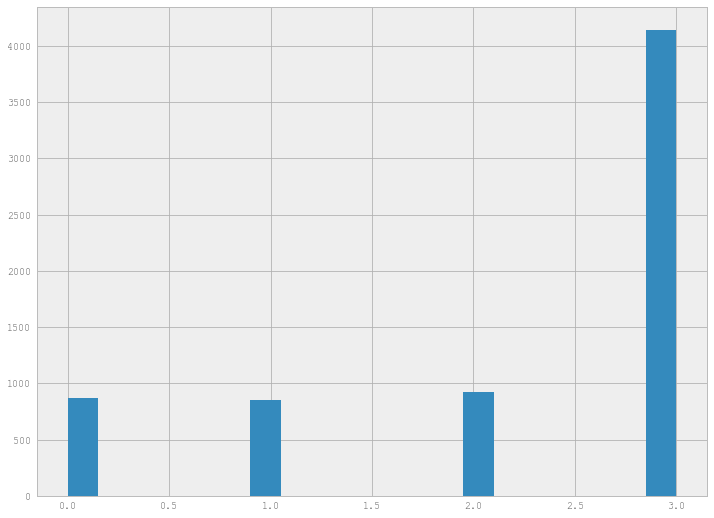

In [14]:
plt.hist(y, 20)

In [19]:
#mtr.iloc[:,:-1].head()

In [15]:
# почистить mtr от лишних символов

# 20 минут
wordsvec = []
mtr2 = mtr.copy()
for j in tqdm(range(mtr2.shape[1])):
    for i in range(mtr2.shape[0]):
        s1 = mtr2.iloc[i, j]
        s1 = s1.lower()
        s1 = string_replace2(s1)
        s1 = string_replace3(s1)
        s1 = s1.split(' ')
        s2 = s1[0];
        # почистил от мусора и красиво пересобрал текстовые поля
        for k in range(1, len(s1)):
            if s1[k] != '':
                s2 = s2 +' '+ s1[k]
        mtr2.iloc[i, j] = s2
        # собрал вектор уникальных значений в матрице
        for k in range(len(s1)):
            if s1[k] not in wordsvec:
                wordsvec.append(s1[k])   

100%|████████████████████████████████████████████████████████████████████████████████| 490/490 [21:17<00:00,  2.61s/it]


In [18]:
print(wordsvec[:100])

['', '0', 'а', 'п', 'рабместо', 'тб', 'клиента', 'фио', 'пользователя', 'время', 'работы', 'вспподразделения', 'сотрудника', 'имя', 'пк', 'номер', 'заявки', 'пользователей', 'которых', 'необходимо', 'перезакрепить', 'коды', 'км', 'полностью', 'логин', 'пользователь', 'адрес', 'обслуживания', 'дул', 'инн', 'организации', 'наименование', 'фирас', 'кабинетарабочего', 'местаокна', 'мус', 'внимание', 'по', 'какому', 'осуществляется', 'операция', 'тип', 'проблемы', 'подробное', 'описание', 'конкретное', 'элемента', 'связанного', 'с', 'запросом', 'в', 'спообк', 'укажите', 'прим', 'активностьзвонок', 'исходящий', 'отчет', 'воронка', 'продаж', 'данный', 'шаблон', 'предназначен', 'для', 'регистрации', 'обращений', 'возникших', 'ходе', 'ас', 'обращения', 'другими', 'просьба', 'оформлять', 'через', 'соответствующие', 'шаблоны', 'портала', 'лицо', 'друга', 'поле', 'сообщение', 'запрещено', 'вносить', 'конфиденциальную', 'информацию', 'к', 'югозападный', 'уральский', 'банк', 'восточносибирский', 'фа

In [20]:
print(len(wordsvec))

16668


In [21]:
# OneHotEncoding pd               
# matrwordvec - матрица для разбиения в единичном числе
# matrwordsvec_nums - матрица для разбиения - сколько раз это слово встречалось                 
# 50 min
matrwordvec = pd.DataFrame(np.zeros((len(mtr2), len(wordsvec)), dtype = int), columns = wordsvec)
matrwordsvec_nums = pd.DataFrame(np.zeros((len(mtr2), len(wordsvec)), dtype = int), columns = [x+'_1' for x in wordsvec])
for j in tqdm(range(mtr2.shape[1])):
    for i in range(mtr2.shape[0]):
        s1 = mtr2.iloc[i, j]
        s1 = s1.split(' ')
        for k in range(len(s1)):
            matrwordvec.iloc[j, wordsvec.index(s1[k])] = 1
            matrwordsvec_nums.iloc[j, wordsvec.index(s1[k])] += 1

length2 = []
for j in tqdm(range(0, len(mtr2.columns))):
    length2.append(len(list(set(mtr2.iloc[:, j]))))

# OneHotEncoding np
    
xmltodict_table_Param_3 = np.zeros((len(mtr2), np.sum(length2)), dtype = int)
xmltodict_table_Param_3_colnames = []
k = 0
for j in tqdm(range(0, len(mtr2.columns))):
    diff = list(set(mtr2.iloc[:, j]))
    for i in range(len(diff)):
        xmltodict_table_Param_3_colnames.append(mtr2.columns[j]+'_'+str(i))
        xmltodict_table_Param_3[mtr2.iloc[:, j] == diff[i], k] = 1
        k += 1




100%|████████████████████████████████████████████████████████████████████████████████| 490/490 [00:28<00:00, 17.04it/s]


In [22]:
# собрать матрицы:
xmltodict_table_Param_3_pd = pd.DataFrame(xmltodict_table_Param_3, columns = xmltodict_table_Param_3_colnames)


# 1
rezult_matr =  matrwordvec.copy()
rezult_matr = pd.concat([rezult_matr, xmltodict_table_Param_3_pd], axis=1)

# 2
#rezult_matr =  matrwordvec.copy()
#rezult_matr = pd.concat([rezult_matr, matrwordsvec_nums], axis=1)
#rezult_matr = pd.concat([rezult_matr, xmltodict_table_Param_3_pd], axis=1)
       
y = table['Class']
uniq_class = list(set(y))
for i in range(len(uniq_class)):
    y[y == uniq_class[i]] = i
y = np.array(y.apply(int) )

X = np.zeros((rezult_matr.shape[0], rezult_matr.shape[1]), dtype = int)
X[:,:] = rezult_matr.iloc[:,:]
features = rezult_matr.columns

length1 = []
for j in tqdm(range(0, X.shape[1])):
    length1.append(len(list(set(X[:, j]))))
print (np.min(length1), np.max(length1))

100%|███████████████████████████████████████████████████████████████████████████| 32322/32322 [00:45<00:00, 716.82it/s]


2 2


In [23]:
rezult_matr.head()

,,0,а,п,рабместо,тб,клиента,фио,пользователя,время,...,Param_1_4149,Param_1_4150,Param_1_4151,Param_1_4152,Param_1_4153,Param_1_4154,Param_1_4155,Param_1_4156,Param_1_4157,Param_1_4158
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Баланс классов

In [27]:
rez = []

random_state = 1999
verbose = 0


X0 = X[y == 0, :]
X1 = X[y == 1, :]
X2 = X[y == 2, :]
X3 = X[y == 3, :]
min_class = np.min([X0.shape[0], X1.shape[0], X2.shape[0], X3.shape[0]])
min_class_index = [X0.shape[0], X1.shape[0], X2.shape[0], X3.shape[0]].index(min_class)

X0train = X0[:min_class, :]; X0test = X0[min_class:, :]; y0train = y[y == 0][:min_class]; y0test = y[y == 0][min_class:]
X1train = X1[:min_class, :]; X1test = X1[min_class:, :]; y1train = y[y == 1][:min_class]; y1test = y[y == 1][min_class:]
X2train = X2[:min_class, :]; X2test = X2[min_class:, :]; y2train = y[y == 2][:min_class]; y2test = y[y == 2][min_class:]
X3train = X3[:min_class, :]; X3test = X3[min_class:, :]; y3train = y[y == 3][:min_class]; y3test = y[y == 3][min_class:]

train_X0, test_X0, train_y0, test_y0 = train_test_split(X0train, y0train, train_size=0.75, random_state=random_state)
train_X1, test_X1, train_y1, test_y1 = train_test_split(X1train, y1train, train_size=0.75, random_state=random_state)
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2train, y2train, train_size=0.75, random_state=random_state)
train_X3, test_X3, train_y3, test_y3 = train_test_split(X3train, y3train, train_size=0.75, random_state=random_state)

train_X = np.concatenate((train_X0, train_X1, train_X2, train_X3), axis=0)
test_X = np.concatenate((test_X0, test_X1, test_X2, test_X3), axis=0)
train_y = np.concatenate((train_y0, train_y1, train_y2, train_y3), axis=0)
test_y = np.concatenate((test_y0, test_y1, test_y2, test_y3), axis=0)



# остатки
Xtest = np.concatenate((X0test, X1test, X2test, X3test), axis=0)
ytest = np.concatenate((y0test, y1test, y2test, y3test), axis=0)



In [30]:
compare_matr = pd.DataFrame(np.zeros((0, 10), dtype = float), columns = ['model', 'num', 'train - avg', 'precision', 'recall', 'f1-score', 'test - avg', 'precision', 'recall', 'f1-score'])


In [32]:
treet = DecisionTreeClassifier(random_state=random_state).fit(train_X, train_y)
dot_data = tree.export_graphviz(treet, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf(INPUT_PATH+'DecisionTreeClassifier.pdf') 

True

## Все дерево

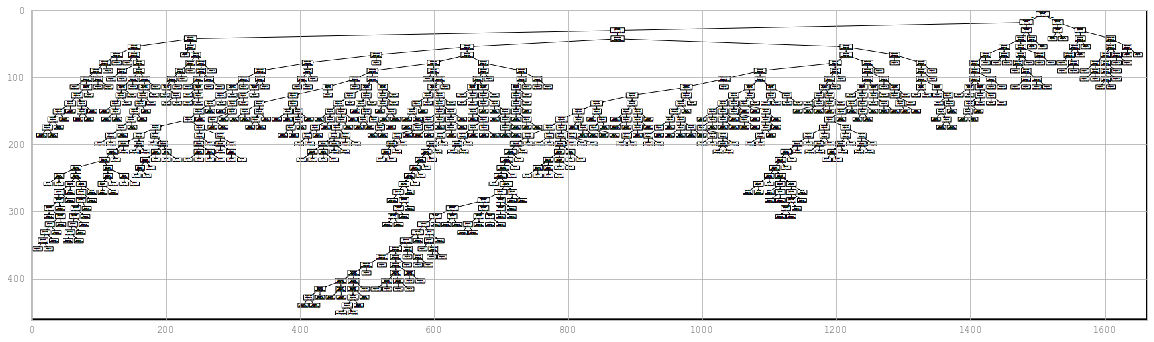

In [37]:
plt.figure(figsize=(20,20))
img=mpimg.imread(INPUT_PATH +  'pic2.png')
plt.imshow(img)

## Часть дерева

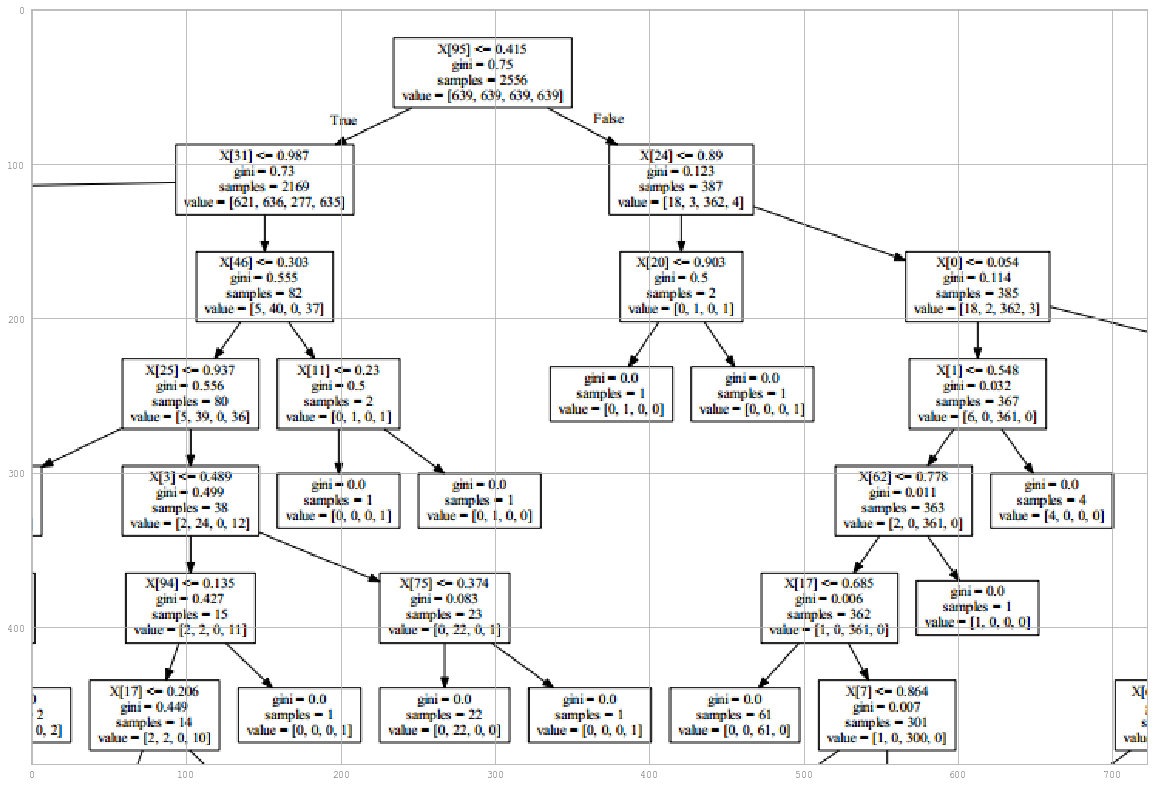

In [39]:
plt.figure(figsize=(20,20))
img=mpimg.imread(INPUT_PATH +  'pic3.png')
plt.imshow(img)

In [41]:
importances = treet.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices[:150]):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, features[idx], importances[idx]))


best_features = indices[:110]
best_features_names = features[best_features] 

Feature importances:
 1. feature '6form-text-@multiline_1' (0.2244)
 2. feature '0    ' (0.1079)
 3. feature '2form-text-@sbtype_0' (0.0927)
 4. feature '5form-text-@label_8' (0.0722)
 5. feature '0form-select-option-@label_33' (0.0419)
 6. feature '1form-select-option-@label_26' (0.0401)
 7. feature 'form-select-@sbtask_0' (0.0082)
 8. feature 'form-checkbox-@visible_0' (0.0077)
 9. feature '1form-select-option-@label_8' (0.0076)
10. feature '5form-text-@id_1' (0.0064)
11. feature '5form-text-@label_15' (0.0058)
12. feature 'Param_1_3767' (0.0056)
13. feature '7form-text-#text_0' (0.0050)
14. feature '3form-text-#text_142' (0.0050)
15. feature '2form-text-@label_50' (0.0042)
16. feature '7form-text-#text_1130' (0.0042)
17. feature '1form-text-#text_176' (0.0038)
18. feature '7form-text-#text_1547' (0.0038)
19. feature '1form-text-#text_304' (0.0033)
20. feature '1form-text-@label_11' (0.0031)
21. feature '0form-text-@label_14' (0.0027)
22. feature '1form-text-#text_141' (0.0026)
23. f

## DecisionTreeClassifier

train:  0.85641627543 test:  0.794600938967 15 entropy 0:00:02.559225


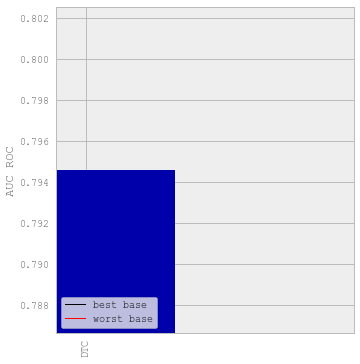

In [43]:
start_time = datetime.datetime.now() 
max_depth_array = list(np.arange(2, 20))
criterion = ['entropy', 'gini']
DTC = DecisionTreeClassifier(random_state=random_state)
grid = GridSearchCV(DTC, param_grid={'max_depth': max_depth_array, 'criterion': criterion})
grid.fit(train_X[:,best_features], train_y)
best_max_depth = grid.best_estimator_.max_depth
best_criterion = grid.best_estimator_.criterion
DTC = DecisionTreeClassifier(criterion=best_criterion, random_state=random_state, max_depth = best_max_depth)
DTC.fit(train_X[:,best_features], train_y)
DTC_pred_train = DTC.predict(train_X[:,best_features])
DTC_pred = DTC.predict(test_X[:,best_features])
print('train: ', accuracy_score(train_y, DTC_pred_train), 'test: ', accuracy_score(test_y, DTC_pred), best_max_depth, best_criterion, datetime.datetime.now() - start_time)
rez.append(('DTC', accuracy_score(test_y, DTC_pred)))

Djplot_rez(rez)
matr_of_metrix('DTC', train_y, test_y, DTC_pred_train, DTC_pred)


train:  0.881455399061 test:  0.803990610329 15 entropy 0:00:21.482654


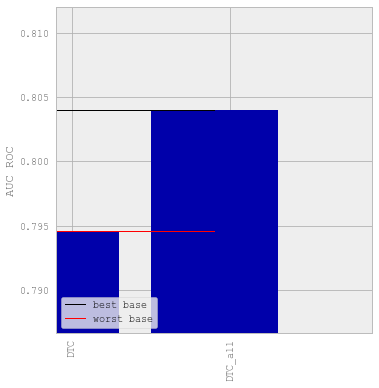

In [44]:
start_time = datetime.datetime.now() 
max_depth_array = list(np.arange(15, 16))
criterion = ['entropy']
DTC_all = DecisionTreeClassifier(random_state=random_state)
grid = GridSearchCV(DTC_all, param_grid={'max_depth': max_depth_array, 'criterion': criterion})
grid.fit(train_X, train_y)
best_max_depth = grid.best_estimator_.max_depth
best_criterion = grid.best_estimator_.criterion
DTC_all = DecisionTreeClassifier(criterion=best_criterion, random_state=random_state, max_depth = best_max_depth)
DTC_all.fit(train_X, train_y)
DTC_all_pred_train = DTC_all.predict(train_X)
DTC_all_pred = DTC_all.predict(test_X)
print('train: ', accuracy_score(train_y, DTC_all_pred_train), 'test: ', accuracy_score(test_y, DTC_all_pred), best_max_depth, best_criterion, datetime.datetime.now() - start_time)

rez.append(('DTC_all', accuracy_score(test_y, DTC_all_pred)))
Djplot_rez(rez)

matr_of_metrix('DTC_all', train_y, test_y, DTC_all_pred_train, DTC_all_pred)


train:  0.872848200313 test:  0.800469483568 25 entropy 0:00:00.892665


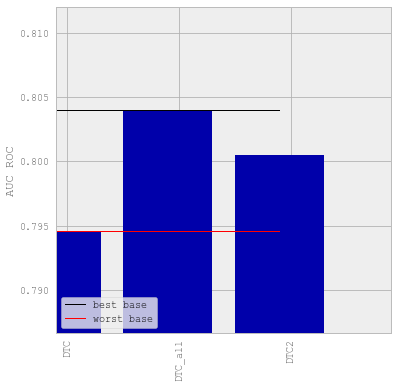

In [45]:
start_time = datetime.datetime.now() 
max_depth_array = list(np.arange(20, 30))
criterion = ['entropy', 'gini']
DTC2 = DecisionTreeClassifier(random_state=random_state)
grid = GridSearchCV(DTC2, param_grid={'max_depth': max_depth_array, 'criterion': criterion})
grid.fit(train_X[:,best_features], train_y)
best_max_depth = grid.best_estimator_.max_depth
best_criterion = grid.best_estimator_.criterion
DTC2 = DecisionTreeClassifier(criterion=best_criterion, random_state=random_state, max_depth = best_max_depth)
DTC2.fit(train_X[:,best_features], train_y)
DTC2_pred_train = DTC2.predict(train_X[:,best_features])
DTC2_pred = DTC2.predict(test_X[:,best_features])

print('train: ', accuracy_score(train_y, DTC2_pred_train), 'test: ', accuracy_score(test_y, DTC2_pred), best_max_depth, best_criterion, datetime.datetime.now() - start_time)

rez.append(('DTC2', accuracy_score(test_y, DTC2_pred)))
Djplot_rez(rez)
matr_of_metrix('DTC2', train_y, test_y, DTC2_pred_train, DTC2_pred)

## KNeighborsClassifier

train:  0.736697965571
test:  0.731220657277
13 4
train:  0.736697965571 test:  0.731220657277 13 4 0:01:37.085928


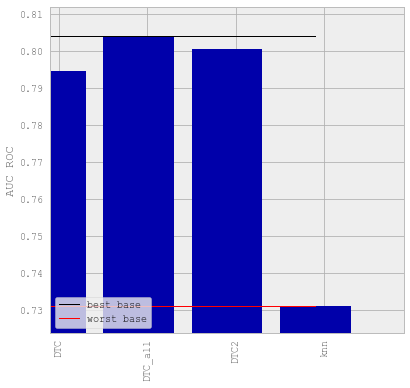

In [46]:
start_time = datetime.datetime.now() 
n_neighbors_array = list(np.arange(10, 20))
leaf_size_array = list(np.arange(2, 8))
knnC = KNeighborsClassifier()
grid = GridSearchCV(knnC, param_grid={'n_neighbors': n_neighbors_array, 'leaf_size' : leaf_size_array})
grid.fit(train_X[:,best_features], train_y)
best_n_neighbors = grid.best_estimator_.n_neighbors
best_leaf_size = grid.best_estimator_.leaf_size
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, leaf_size = best_leaf_size)
knn.fit(train_X[:,best_features], train_y)
knn_pred_train = knn.predict(train_X[:,best_features])
print('train: ', accuracy_score(train_y, knn_pred_train))
knn_pred = knn.predict(test_X[:,best_features])
print('test: ', accuracy_score(test_y, knn_pred))
print(best_n_neighbors, best_leaf_size)
print('train: ', accuracy_score(train_y, knn_pred_train), 'test: ', accuracy_score(test_y, knn_pred), best_n_neighbors, best_leaf_size, datetime.datetime.now() - start_time)


rez.append(('knn', accuracy_score(test_y, knn_pred)))
Djplot_rez(rez)
matr_of_metrix('knn', train_y, test_y, knn_pred_train, knn_pred)


## ExtraTreeClassifier

train:  0.868935837246 test:  0.799295774648 21 entropy 0:00:05.556943


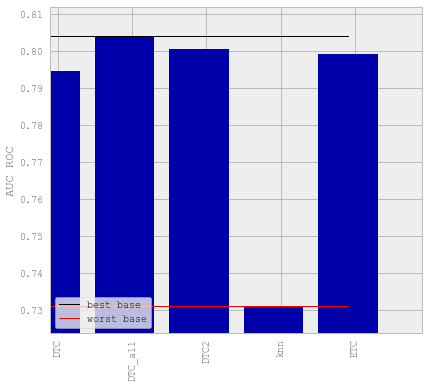

In [48]:
start_time = datetime.datetime.now() 
max_depth_array = list(np.arange(2, 110))
criterion = ['entropy', 'gini']
ETC = ExtraTreeClassifier(random_state=random_state)
grid = GridSearchCV(ETC, param_grid={'max_depth': max_depth_array, 'criterion': criterion})
grid.fit(train_X[:,best_features], train_y)
best_max_depth = grid.best_estimator_.max_depth
best_criterion = grid.best_estimator_.criterion
ETC = ExtraTreeClassifier(criterion=best_criterion, random_state=random_state, max_depth = best_max_depth)
ETC.fit(train_X[:,best_features], train_y)
ETC_pred_train = ETC.predict(train_X[:,best_features])
ETC_pred = ETC.predict(test_X[:,best_features])
print('train: ', accuracy_score(train_y, ETC_pred_train), 'test: ', accuracy_score(test_y, ETC_pred), best_max_depth, best_criterion, datetime.datetime.now() - start_time)

rez.append(('ETC', accuracy_score(test_y, ETC_pred)))
Djplot_rez(rez)
matr_of_metrix('ETC', train_y, test_y, ETC_pred_train, ETC_pred)


## GradientBoostingClassifier

train:  0.875195618153 test:  0.793427230047 1 deviance 0:00:23.850487


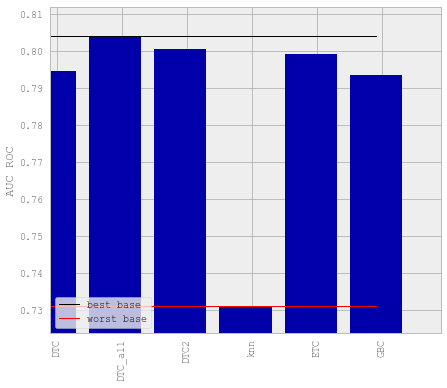

In [49]:
start_time = datetime.datetime.now() 
learning_rate = [0.01, 0.1, 1]
loss = ['deviance']
GBC = GradientBoostingClassifier(random_state=random_state)
grid = GridSearchCV(GBC, param_grid={'learning_rate': learning_rate, 'loss': loss})
grid.fit(train_X[:,best_features], train_y)
best_learning_rate = grid.best_estimator_.learning_rate
best_loss = grid.best_estimator_.loss
GBC = GradientBoostingClassifier(loss=best_loss, random_state=random_state, learning_rate = best_learning_rate)
GBC.fit(train_X[:,best_features], train_y)
GBC_pred_train = GBC.predict(train_X[:,best_features])
GBC_pred = GBC.predict(test_X[:,best_features])
print('train: ', accuracy_score(train_y, GBC_pred_train), 'test: ', accuracy_score(test_y, GBC_pred), best_learning_rate, best_loss, datetime.datetime.now() - start_time)

rez.append(('GBC', accuracy_score(test_y, GBC_pred)))
Djplot_rez(rez)
matr_of_metrix('GBC', train_y, test_y, GBC_pred_train, GBC_pred)


##  LinearSVC

train:  0.841549295775 test:  0.806338028169 1 0:00:01.823313


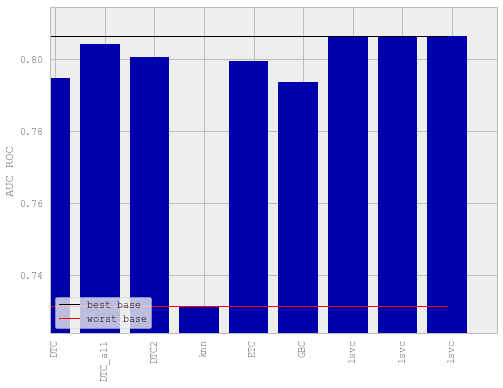

In [52]:
start_time = datetime.datetime.now() 
C_array = [0.01, 0.1, 1]
lsvc = LinearSVC(verbose = 0)
grid = GridSearchCV(lsvc, param_grid={'C': C_array})
grid.fit(train_X[:,best_features], train_y)
lsvc = LinearSVC(C=grid.best_estimator_.C, verbose = 0)
lsvc.fit(train_X[:,best_features], train_y)
lsvc_pred_train = lsvc.predict(train_X[:,best_features])
lsvc_pred = lsvc.predict(test_X[:,best_features])
print('train: ', accuracy_score(train_y, lsvc_pred_train), 'test: ', accuracy_score(test_y, lsvc_pred), grid.best_estimator_.C, datetime.datetime.now() - start_time)

rez.append(('lsvc', accuracy_score(test_y, lsvc_pred)))
Djplot_rez(rez)
matr_of_metrix('lsvc', train_y, test_y, lsvc_pred_train, lsvc_pred)

##  RandomForestClassifier

train:  0.688575899844 test:  0.704225352113 18 3 0:01:25.212501


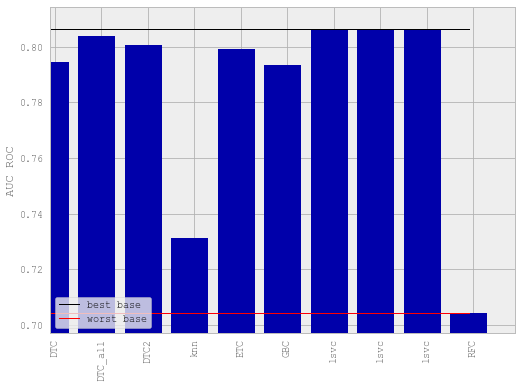

In [53]:
start_time = datetime.datetime.now() 
max_depth_array = list(np.arange(2, 4))
n_estimators_array = list(np.arange(1, 55))
RFC = RandomForestClassifier(n_jobs=-1, verbose=verbose, random_state=random_state)
grid = GridSearchCV(RFC, param_grid={'n_estimators': n_estimators_array, 'max_depth': max_depth_array})
grid.fit(train_X[:,best_features], train_y)
best_n_estimators = grid.best_estimator_.n_estimators
best_max_depth = grid.best_estimator_.max_depth
RFC = RandomForestClassifier(n_jobs=-1, n_estimators = best_n_estimators, max_depth = best_max_depth)
RFC.fit(train_X[:,best_features], train_y)
RFC_pred_train = RFC.predict(train_X[:,best_features])
RFC_pred = RFC.predict(test_X[:,best_features])
print('train: ', accuracy_score(train_y, RFC_pred_train), 'test: ', accuracy_score(test_y, RFC_pred), best_n_estimators, best_max_depth, datetime.datetime.now() - start_time)

rez.append(('RFC', accuracy_score(test_y, RFC_pred)))
Djplot_rez(rez)
matr_of_metrix('RFC', train_y, test_y, RFC_pred_train, RFC_pred)

## Анализ моделей

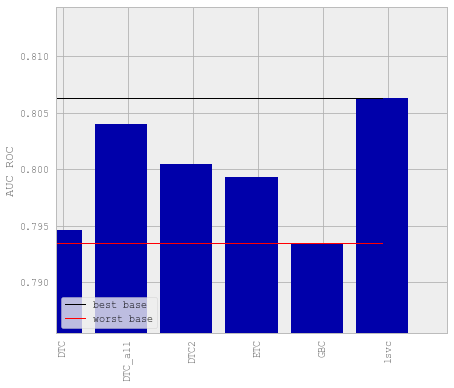

In [59]:
models = [DTC, DTC_all, DTC2, knn, ETC, GBC, lsvc, RFC]

names = [x[0] for x in rez]
aucs = [x[1] for x in rez]
d = np.mean(aucs)
if d < 0.5: d = 0.5
# print (len(models), len(names), len(aucs), d)
if d > 0.8: d = 0.8
#aucs1 = [x for x in aucs if x > d]
nums = [aucs.index(x) for x in aucs if x > d]
nums = list(set(nums))
rez = [ [names[i], aucs[i]] for i in nums]; 
names = [x[0] for x in rez]
#models = [ models[i] for i in nums];

Djplot_rez(rez) 

In [60]:
compare_matr

,model,num,train - avg,precision,recall,f1-score,test - avg,precision,recall,f1-score
0,DTC,0.0,0.999217,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
1,DTC,1.0,0.788242,0.884892,0.577465,0.698864,0.720407,0.884892,0.577465,0.698864
2,DTC,2.0,0.790340,0.606061,0.845070,0.705882,0.719004,0.606061,0.845070,0.705882
3,DTC,3.0,0.879003,0.813131,0.755869,0.783455,0.784152,0.813131,0.755869,0.783455
0,DTC_all,0.0,1.000000,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
1,DTC_all,1.0,0.819527,0.914729,0.553991,0.690058,0.719593,0.914729,0.553991,0.690058
2,DTC_all,2.0,0.818928,0.621160,0.854460,0.719368,0.731663,0.621160,0.854460,0.719368
3,DTC_all,3.0,0.915204,0.811321,0.807512,0.809412,0.809415,0.811321,0.807512,0.809412
0,DTC2,0.0,0.999217,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
1,DTC2,1.0,0.807210,0.833333,0.586854,0.688705,0.702964,0.833333,0.586854,0.688705


In [62]:
compare_matr.sort_values(by=['test - avg'], ascending=False)

,model,num,train - avg,precision,recall,f1-score,test - avg,precision,recall,f1-score
0,ETC,0.0,0.998435,0.981567,1.000000,0.990698,0.990755,0.981567,1.000000,0.990698
0,DTC,0.0,0.999217,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
0,DTC_all,0.0,1.000000,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
0,DTC2,0.0,0.999217,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
0,GBC,0.0,0.999217,0.977064,1.000000,0.988399,0.988488,0.977064,1.000000,0.988399
0,lsvc,0.0,0.997655,0.972603,1.000000,0.986111,0.986238,0.972603,1.000000,0.986111
0,lsvc,0.0,0.997655,0.972603,1.000000,0.986111,0.986238,0.972603,1.000000,0.986111
0,lsvc,0.0,0.997655,0.972603,1.000000,0.986111,0.986238,0.972603,1.000000,0.986111
0,knn,0.0,0.980124,0.950893,1.000000,0.974828,0.975240,0.950893,1.000000,0.974828
0,RFC,0.0,0.899967,0.838583,1.000000,0.912206,0.916929,0.838583,1.000000,0.912206
